# Animal-10

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the libraries and dataset

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
!unrar x "/content/drive/MyDrive/Colab Notebooks/My Projects/animal-10/dataset.rar" "/content"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Extracting  /content/dataset/scoiattolo/OIP-zGQZIl0zO8kIxvK_A6zgTgHaE7.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-ZH-7-Z2Ip_sPzeKlfGl_9gHaFk.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-Zh384dOlRCWBqPO4Sg5zyQHaEX.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-zhJ-pBR-0ryoI4c8Y00XIgHaD3.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-zhLz2NNZOh527Bvrz2dlpAHaFw.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-ZleIH_fUEq6QLqg0r9SDawHaFj.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-zM3-CoKympHhLnHTWerTmQAAAA.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-ZmMwHrIxTMAvXZvq4FT10AHaGF.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-zmrCT577lLJ3FGpqKbGFAAHaGl.jpeg      99%  OK 
Extracting  /content/dataset/scoiattolo/OIP-zoNeR-sDqoFiOkMJrG

In [4]:
tf.__version__

'2.8.2'

## Part 1 - Data Preprocessing

In [5]:
import numpy as np
import matplotlib.pyplot as plt


### Preprocessing the Dataset

In [6]:
all_datagen = ImageDataGenerator(rescale = 1./255,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True,
                                 rotation_range = 10,
                                 brightness_range= [0.5, 1],
                                 validation_split= 0.2)
training_set = all_datagen.flow_from_directory('dataset',
                                                 target_size = (224,224),
                                                 batch_size=32,
                                                 class_mode= 'categorical',
                                                 subset = 'training')

test_set = all_datagen.flow_from_directory('dataset',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset = 'validation')

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


## Part 2 - Building the Model

### Initialising the Model

In [16]:
cnn = tf.keras.models.Sequential()



### Step 1 - Convolution

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), activation='relu', input_shape=(224,224,3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())

### Step 3 - Global Average Pooling 2D

In [18]:
cnn.add(tf.keras.layers.GlobalAveragePooling2D())

### Step 4 - Full Connection

In [19]:
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))

In [20]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      9472      
                                                                 
 batch_normalization_6 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 54, 54, 128)       204928    
                                                                 
 batch_normalization_7 (Batc  (None, 54, 54, 128)      512       
 hNormalization)                                                 
                                                      

### Step 5 - Output Layer

In [21]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Part 3 - Training the Model

### Compiling the Model

In [22]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

### Training the Model on the Training set and evaluating it on the Test set

In [24]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30, callbacks = [early_stopping])

Epoch 1/30
655/655 [==============================] - 369s 563ms/step - loss: 1.9619 - accuracy: 0.3141 - val_loss: 2.3876 - val_accuracy: 0.2357
Epoch 2/30
655/655 [==============================] - 370s 566ms/step - loss: 1.6215 - accuracy: 0.4303 - val_loss: 2.6136 - val_accuracy: 0.2754
Epoch 3/30
655/655 [==============================] - 358s 547ms/step - loss: 1.3658 - accuracy: 0.5284 - val_loss: 2.1887 - val_accuracy: 0.3394
Epoch 4/30
655/655 [==============================] - 354s 540ms/step - loss: 1.1802 - accuracy: 0.5963 - val_loss: 1.7873 - val_accuracy: 0.4243
Epoch 5/30
655/655 [==============================] - 352s 538ms/step - loss: 1.0385 - accuracy: 0.6472 - val_loss: 1.9097 - val_accuracy: 0.4438
Epoch 6/30
655/655 [==============================] - 355s 541ms/step - loss: 0.9268 - accuracy: 0.6920 - val_loss: 1.3357 - val_accuracy: 0.5866
Epoch 7/30
655/655 [==============================] - 351s 536ms/step - loss: 0.8255 - accuracy: 0.7254 - val_loss: 1.1114 -

In [33]:
cnn.save('/content/drive/MyDrive/Colab Notebooks/My Projects/animal-10/model-28-July/animal10-28-july.hdf5')

## Part 4 - Making a single prediction

In [35]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

'elephant'

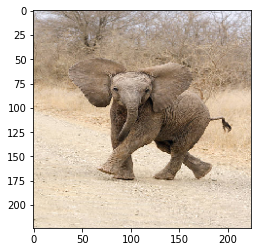

In [39]:
test_image = image.load_img('elephant_1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
model = load_model('/content/drive/MyDrive/Colab Notebooks/My Projects/animal-10/model-28-July/animal10-28-july.hdf5')
result = model.predict(test_image)
test_image = np.squeeze(test_image)
plt.imshow(test_image)
translate[np.argmax(result[0])]

## Part 6 - Comparison of Train and Validation Values

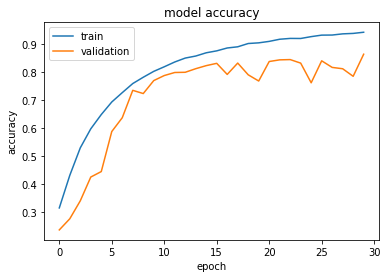

In [31]:
def acc_history(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

acc_history(history)

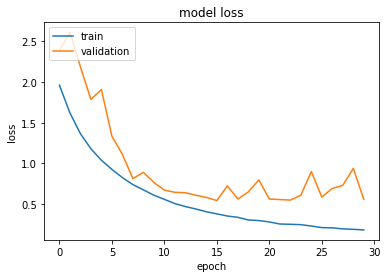

In [32]:
def loss_history(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

loss_history(history)